#### 0. pandas 패키지 import

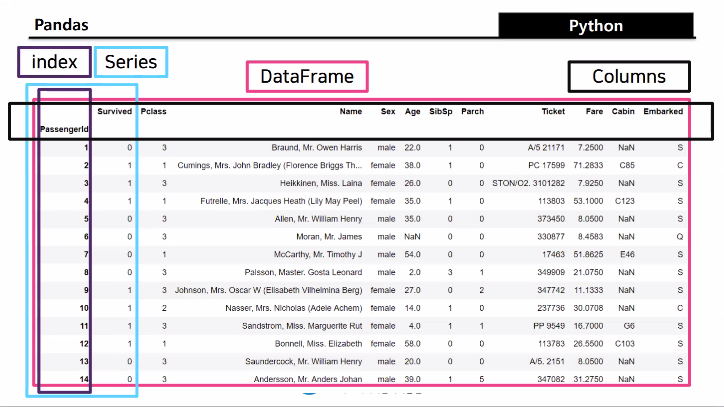

- 표 형태의 데이터를 다루는데 특화된 도구 
- 데이터를 색인하는 index 개념을 행과 열에 따라 다른 명칭 부여 
- 행을 색인하는 인덱스 -> index 
- 열을 색인하는 인덱스 -> column
- 1차원 데이터를 표현하는 클래스 -> Series
- 2차원 데이터를 표현하는 클래스 -> DataFrame

In [3]:
import pandas as pd

#### 1. Series 사용하기

In [2]:
# series 생성
h = pd.Series([179, 165, 140, 158, 192])
h

0    179
1    165
2    140
3    158
4    192
dtype: int64

In [3]:
#글자 인덱스 부여해서 Series 생성
w = pd.Series([60, 58, 81, 77, 47], index=["선영표", "정봉균", "황해도",
                                           "박병관", "정형"])
w

선영표    60
정봉균    58
황해도    81
박병관    77
정형     47
dtype: int64

In [4]:
# 이름을 부여해서 Series 생성
w = pd.Series([60, 58, 81, 77, 47], index=["선영표", "정봉균", "황해도",
                                           "박병관", "정형"],
              name = "몸무게")
w

선영표    60
정봉균    58
황해도    81
박병관    77
정형     47
Name: 몸무게, dtype: int64

In [5]:
# 속성 활용하기
display(w.shape) # 모양 확인
display(w.values) # numpy 타입으로 값 확인 
display(w.index) # 인덱스만 꺼내고 싶은 경우
display(w.dtype) # 데이터 타입을 알고 싶은 경우

(5,)

array([60, 58, 81, 77, 47], dtype=int64)

Index(['선영표', '정봉균', '황해도', '박병관', '정형'], dtype='object')

dtype('int64')

In [6]:
# 연산 -> 같은 인덱스끼리 요소별 연산 지원 
# 같은 인덱스가 없는 경우 연산 할 수 없어 NaN 발생 
# NaN = Not a Number : (데이터 분석에서는) 데이터가 없다 = 결측치
w / ( h ** 2)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
박병관   NaN
선영표   NaN
정봉균   NaN
정형    NaN
황해도   NaN
dtype: float64

In [7]:
# 키 데이터에 인덱스를 부여
h.index = ["선영표", "정봉균", "황해도", "박병관", "정형"]
h

선영표    179
정봉균    165
황해도    140
박병관    158
정형     192
dtype: int64

In [8]:
# cm -> m단위로 변경 후 계산
w / ((h/100) * 2)

선영표    16.759777
정봉균    17.575758
황해도    28.928571
박병관    24.367089
정형     12.239583
dtype: float64

In [9]:
# 인덱싱 & 슬라이싱
display(h["선영표"])
display(h[0])
display(h[["선영표", "정봉균"]])
display(h[[0,3]])
display(w[1:4]) # 숫자 슬라이싱은 끝에서 하나 작을 때까지
display(w["선영표":"박병관"]) # 글자 슬라이싱은 적힌 인덱스까지

179

179

선영표    179
정봉균    165
dtype: int64

선영표    179
박병관    158
dtype: int64

정봉균    58
황해도    81
박병관    77
Name: 몸무게, dtype: int64

선영표    60
정봉균    58
황해도    81
박병관    77
Name: 몸무게, dtype: int64

In [10]:
# boolean 색인
java = pd.Series({"선영표":90, "박병관":79, "정봉균":57, "정형":99})
java[java<=80]

박병관    79
정봉균    57
dtype: int64

In [11]:
# 조건을 여러개 넣고 싶은 경우 
java[(java>=90)|(java<=60)]

선영표    90
정봉균    57
정형     99
dtype: int64

#### 2. DataFrame 사용하기

In [12]:
#생성
df = pd.DataFrame([['선영표', 160, 56],
                   ['박병관', 175, 80],
                   ['정봉균', 179, 76]])
df

,0,1,2
0,선영표,160,56
1,박병관,175,80
2,정봉균,179,76


In [13]:
# 글자 인덱스를 부여해서 생성
#생성
df = pd.DataFrame([['선영표', 160, 56],
                   ['박병관', 175, 80],
                   ['정봉균', 179, 76]],
                   index = ['1번', '2번', '3번'],
                   columns = ['이름', '키', '몸무게'])
df

,이름,키,몸무게
1번,선영표,160,56
2번,박병관,175,80
3번,정봉균,179,76


In [14]:
# 속성
display(df.shape) #모양확인
display(df.values) #numpy배열로 값만 추출 
display(df.index) # 행 인덱스 추출
display(df.columns) # 열 인덱스 추출
display(df.dtypes) # 각 열별 데이터 타입 확인


(3, 3)

array([['선영표', 160, 56],
       ['박병관', 175, 80],
       ['정봉균', 179, 76]], dtype=object)

Index(['1번', '2번', '3번'], dtype='object')

Index(['이름', '키', '몸무게'], dtype='object')

이름     object
키       int64
몸무게     int64
dtype: object

In [15]:
# 연산 -> numpy 연산과 동일
df['몸무게']/(df['키']/100) ** 2

1번    21.875000
2번    26.122449
3번    23.719609
dtype: float64

In [16]:
# index & slicing
# 인덱싱: 기본적으로 열 기준으로 색인하는 것을 우선시 
display(df['몸무게']) #시리즈
display(df[['몸무게', '키']]) #데이터프레임
# 데이터타입에서 하나의 열을 가져오면 시리즈로 변환됨(1차원이니까!)
# 슬라이싱 : 기본적으로 행 기준으로 색인하는 것을 우선시 
display(df["키":"몸무게"])
display(df["1번":"2번"])

1번    56
2번    80
3번    76
Name: 몸무게, dtype: int64

,몸무게,키
1번,56,160
2번,80,175
3번,76,179


,이름,키,몸무게


,이름,키,몸무게
1번,선영표,160,56
2번,박병관,175,80


In [17]:
df['1번'] 
# 에러 발생 => "열" 인덱스가 아니라 "행" 인덱스이기 때문에 인식하지 못함

KeyError: '1번'

In [18]:
# 헷갈리는 걸 방지하기 위해 추천하는 인덱서
# iloc와 loc 
# display(df.loc[행, 열]) : 글자, 숫자 인덱스 
# display(df.iloc[행, 열]) : 숫자 인덱스 

In [19]:
display(df.loc['1번', '이름']) 
display(df.iloc[1, 0])

'선영표'

'박병관'

In [20]:
display(df.loc["2번", "키":"몸무게"])
display(df.iloc[0, 0:2])

키      175
몸무게     80
Name: 2번, dtype: object

이름    선영표
키     160
Name: 1번, dtype: object

In [21]:
#boolean  색인 
df[df['몸무게'] <= 60]

,이름,키,몸무게
1번,선영표,160,56


In [22]:
df[(df['키'] <= 160) | (df['키'] >= 178)]

,이름,키,몸무게
1번,선영표,160,56
3번,정봉균,179,76


#### 3. 유용한 함수

#### 3.1 기술통계 관련

In [23]:
# 데이터 로딩 
# csv = comma seperated values (comma로 분류된 값)

score_df = pd.read_csv("./data/score.csv", encoding="euc-kr")
score_df

,과목,1반,2반,3반,4반
0,수학,45,44,73,39
1,영어,76,92,45,69
2,국어,47,92,45,69
3,사회,92,81,85,40
4,과학,11,79,47,26


In [24]:
# 과목별 평균 구하기
score_df.loc[:, '1반':'4반'].mean(axis=1)

0    50.25
1    70.50
2    63.25
3    74.50
4    40.75
dtype: float64

In [25]:
# 원본 데이터프레임에 과목별 평균 데이터 추가하기 
score_df['과목별 평균']= score_df.loc[:, '1반':'4반'].mean(axis=1)
score_df

,과목,1반,2반,3반,4반,과목별 평균
0,수학,45,44,73,39,50.25
1,영어,76,92,45,69,70.50
2,국어,47,92,45,69,63.25
3,사회,92,81,85,40,74.50
4,과학,11,79,47,26,40.75


In [26]:
# 원본 데이터프레임에 과목별 총합데이터 추가하기 
score_df['과목별 총합']= score_df.loc[:, '1반':'4반'].sum(axis=1)
score_df

,과목,1반,2반,3반,4반,과목별 평균,과목별 총합
0,수학,45,44,73,39,50.25,201
1,영어,76,92,45,69,70.50,282
2,국어,47,92,45,69,63.25,253
3,사회,92,81,85,40,74.50,298
4,과학,11,79,47,26,40.75,163


In [27]:
# 반별 평균 구하기 
class_mean = score_df.iloc[0:5,1:5].mean()
class_mean

1반    54.2
2반    77.6
3반    59.0
4반    48.6
dtype: float64

In [28]:
# 5번째 행 인덱스에 반별 평균 대입 
score_df.loc["반별 총합"] = class_mean

In [29]:
# 존재하지 않는 인덱스는 NaN을 넣어 결측치로 표시해준다
score_df

,과목,1반,2반,3반,4반,과목별 평균,과목별 총합
0,수학,45.0,44.0,73.0,39.0,50.25,201.0
1,영어,76.0,92.0,45.0,69.0,70.50,282.0
2,국어,47.0,92.0,45.0,69.0,63.25,253.0
3,사회,92.0,81.0,85.0,40.0,74.50,298.0
4,과학,11.0,79.0,47.0,26.0,40.75,163.0
반별 총합,NaN,54.2,77.6,59.0,48.6,NaN,NaN


#### 3.2 결측치 처리 함수
- 누락된 데이터를 대체값으로 채우는 경우 
- 누락된 데이터를 포함한 행이나 열을 삭제

In [30]:
pop_df = pd.read_csv("./data/population_number.csv", encoding="euc-kr")
pop_df

,도시,지역,2015,2010,2005,2000
0,서울,수도권,9904312,9631482.0,9762546.0,9853972
1,부산,경상권,3448737,NaN,NaN,3655437
2,인천,수도권,2890451,2632035.0,NaN,2466338
3,대구,경상권,2466052,2431774.0,2456016.0,2473990


In [31]:
# 누락된 데이터를 대체값으로 채우는 경우 
pop_df.fillna(0)

,도시,지역,2015,2010,2005,2000
0,서울,수도권,9904312,9631482.0,9762546.0,9853972
1,부산,경상권,3448737,0.0,0.0,3655437
2,인천,수도권,2890451,2632035.0,0.0,2466338
3,대구,경상권,2466052,2431774.0,2456016.0,2473990


In [32]:
# 복수본에 대해 작업을 해주는 함수들이 있기 때문에 대입을 해주거나 
pop_df = pop_df.fillna(0)

In [33]:
# 함수 속성 inplace 라는 속성을 True로 적용 
pop_df.fillna(0, inplace=True)

In [34]:
pop_df

,도시,지역,2015,2010,2005,2000
0,서울,수도권,9904312,9631482.0,9762546.0,9853972
1,부산,경상권,3448737,0.0,0.0,3655437
2,인천,수도권,2890451,2632035.0,0.0,2466338
3,대구,경상권,2466052,2431774.0,2456016.0,2473990


In [35]:
# 기술통계관련 함수를 이용해 대체값 채우기
pop_df = pd.read_csv("./data/population_number.csv", encoding='euc-kr')
pop_df['2010'] = pop_df['2010'].fillna(pop_df['2010'].mean())

In [36]:
pop_df

,도시,지역,2015,2010,2005,2000
0,서울,수도권,9904312,9.631482e+06,9762546.0,9853972
1,부산,경상권,3448737,4.898430e+06,NaN,3655437
2,인천,수도권,2890451,2.632035e+06,NaN,2466338
3,대구,경상권,2466052,2.431774e+06,2456016.0,2473990


In [37]:
pop_df['2005'] = pop_df['2005'].fillna(pop_df['2005'].mean())
pop_df

,도시,지역,2015,2010,2005,2000
0,서울,수도권,9904312,9.631482e+06,9762546.0,9853972
1,부산,경상권,3448737,4.898430e+06,6109281.0,3655437
2,인천,수도권,2890451,2.632035e+06,6109281.0,2466338
3,대구,경상권,2466052,2.431774e+06,2456016.0,2473990


In [38]:
# 누락된 데이터가 포함된 행 or 열을 삭제 
pop_df = pd.read_csv("./data/population_number.csv", encoding='euc-kr')
pop_df.drop(['2010', '2005'], axis=1, inplace=True) #inplace를 통해 원본에 적용

In [39]:
pop_df

,도시,지역,2015,2000
0,서울,수도권,9904312,9853972
1,부산,경상권,3448737,3655437
2,인천,수도권,2890451,2466338
3,대구,경상권,2466052,2473990


In [40]:
# 특정 행이나 열을 지칭하지 않고 결측치가 존재하면 삭제하는 함수 
pop_df = pd.read_csv("./data/population_number.csv", encoding='euc-kr')
pop_df.dropna()

,도시,지역,2015,2010,2005,2000
0,서울,수도권,9904312,9631482.0,9762546.0,9853972
3,대구,경상권,2466052,2431774.0,2456016.0,2473990


#### 3.3 데이터 정렬

- 행이나 열 정보가 많은 경우 자동으로 생략 된다 
- 원하는 크기만큼 보여주도록 옵션을 설정해보자 
- import 하는 부분에서 자주 설정함 

In [41]:
pd.set_option("display.max_rows",10) #보여주는 최대 행 수 지정

In [42]:
tf22 =pd.read_csv("./data/도로교통공단_가해운전자 연령층별 월별 교통사고(2022).csv", encoding='euc-kr')
tf22.head(8)
tf22.tail(8)
# .head => 상위 값(기본 5개) 보여줌. 더 보고 싶으면 괄호 숫자 변경

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
88,불명,5,259,0,29,199,62
89,불명,6,216,0,25,167,50
90,불명,7,215,0,20,150,63
91,불명,8,233,0,33,187,58
92,불명,9,280,0,44,196,65
93,불명,10,224,0,29,172,60
94,불명,11,243,0,28,205,69
95,불명,12,247,0,25,184,66


In [43]:
# 사고 건수를 기준으로 정렬 
# sort_values : 값을 기준으로 데이터를 정렬
# sort_index : 인덱스를 기준으로 데이터를 정렬 

tf22.sort_values(by=['사망자수','사고건수'], ascending=False)

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
82,65세이상,11,3388,78,824,3645,294
81,65세이상,10,3607,73,1043,3878,291
79,65세이상,8,2920,72,847,3124,227
80,65세이상,9,3260,71,881,3467,275
76,65세이상,5,3245,70,939,3384,303
...,...,...,...,...,...,...,...
89,불명,6,216,0,25,167,50
90,불명,7,215,0,20,150,63
87,불명,4,211,0,15,170,46
86,불명,3,183,0,16,144,44


In [44]:
tf22.sort_index(axis=1) # 행이나 열 기준을 axis로 수정 가능 

,가해자연령층,경상자수,발생월,부상신고자수,사고건수,사망자수,중상자수
0,20세이하,458,1,52,435,6,123
1,20세이하,349,2,54,357,2,102
2,20세이하,464,3,73,473,3,141
3,20세이하,559,4,97,580,7,154
4,20세이하,631,5,133,713,6,191
...,...,...,...,...,...,...,...
91,불명,187,8,58,233,0,33
92,불명,196,9,65,280,0,44
93,불명,172,10,60,224,0,29
94,불명,205,11,69,243,0,28


#### 3.4 데이터 그룹화

In [45]:
tf22.groupby(by="가해자연령층")

In [46]:
# groupby를 하면 내부적으로 작은 데이터프레임으로 묶여있게 된다. 
for labe, small_df in tf22.groupby(by="가해자연령층"):
    display(small_df)

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,435,6,123,458,52
1,20세이하,2,357,2,102,349,54
2,20세이하,3,473,3,141,464,73
3,20세이하,4,580,7,154,559,97
4,20세이하,5,713,6,191,631,133
...,...,...,...,...,...,...,...
7,20세이하,8,557,7,150,499,86
8,20세이하,9,609,8,167,527,114
9,20세이하,10,618,8,167,549,89
10,20세이하,11,532,8,161,491,72


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
12,21-30세,1,2307,31,591,2679,200
13,21-30세,2,1787,22,436,2009,169
14,21-30세,3,1950,26,529,2087,177
15,21-30세,4,2310,16,630,2630,200
16,21-30세,5,2503,29,657,2842,220
...,...,...,...,...,...,...,...
19,21-30세,8,2322,30,595,2555,232
20,21-30세,9,2276,28,555,2677,187
21,21-30세,10,2376,38,565,2634,243
22,21-30세,11,2228,26,598,2370,241


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
24,31-40세,1,2336,28,599,2599,220
25,31-40세,2,2001,30,536,2207,160
26,31-40세,3,1969,19,485,2205,130
27,31-40세,4,2409,29,639,2681,214
28,31-40세,5,2525,26,655,2728,230
...,...,...,...,...,...,...,...
31,31-40세,8,2330,30,532,2672,224
32,31-40세,9,2268,25,588,2500,197
33,31-40세,10,2589,32,628,2880,242
34,31-40세,11,2489,23,647,2692,240


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
36,41-50세,1,2939,33,747,3184,225
37,41-50세,2,2197,20,583,2305,198
38,41-50세,3,2391,27,643,2486,173
39,41-50세,4,2805,29,736,3063,214
40,41-50세,5,3096,34,826,3247,248
...,...,...,...,...,...,...,...
43,41-50세,8,2776,30,732,3085,239
44,41-50세,9,2900,37,759,3218,278
45,41-50세,10,3083,38,793,3466,284
46,41-50세,11,2994,43,749,3176,257


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
48,51-60세,1,3683,40,1011,3974,258
49,51-60세,2,2849,34,765,3110,210
50,51-60세,3,3191,37,830,3308,207
51,51-60세,4,3772,56,1004,4094,287
52,51-60세,5,3989,47,1125,4231,389
...,...,...,...,...,...,...,...
55,51-60세,8,3677,44,972,4108,320
56,51-60세,9,3872,61,971,4167,347
57,51-60세,10,4156,53,1152,4552,379
58,51-60세,11,4001,52,1074,4159,321


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
60,61-64세,1,1494,19,429,1652,97
61,61-64세,2,1112,16,345,1163,70
62,61-64세,3,1211,23,342,1242,74
63,61-64세,4,1535,20,447,1745,117
64,61-64세,5,1735,23,450,1945,108
...,...,...,...,...,...,...,...
67,61-64세,8,1681,29,440,1928,109
68,61-64세,9,1751,27,483,1863,118
69,61-64세,10,1855,43,506,2048,125
70,61-64세,11,1703,27,463,1823,144


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
72,65세이상,1,2469,36,713,2525,188
73,65세이상,2,1887,37,516,1945,165
74,65세이상,3,2252,48,654,2240,159
75,65세이상,4,2850,59,853,2931,273
76,65세이상,5,3245,70,939,3384,303
...,...,...,...,...,...,...,...
79,65세이상,8,2920,72,847,3124,227
80,65세이상,9,3260,71,881,3467,275
81,65세이상,10,3607,73,1043,3878,291
82,65세이상,11,3388,78,824,3645,294


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
84,불명,1,231,0,23,188,56
85,불명,2,172,0,18,121,52
86,불명,3,183,0,16,144,44
87,불명,4,211,0,15,170,46
88,불명,5,259,0,29,199,62
...,...,...,...,...,...,...,...
91,불명,8,233,0,33,187,58
92,불명,9,280,0,44,196,65
93,불명,10,224,0,29,172,60
94,불명,11,243,0,28,205,69


In [47]:
# 그룹화한 뒤 집계함수 호출
tf22.groupby(by="가해자연령층").sum()

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
가해자연령층,,,,,,
20세이하,78,6508,72,1811,5997,1055
21-30세,78,26904,335,6845,30295,2566
31-40세,78,28402,317,7135,31607,2545
41-50세,78,33915,409,8813,36702,2874
51-60세,78,44581,570,11834,48206,3592
61-64세,78,19160,297,5226,20938,1402
65세이상,78,34652,735,9746,36602,2933
불명,78,2714,0,305,2083,691


In [48]:
# 22년에 사고를 제일 많이 낸 연령층은 어딜까?
tf22.groupby(by="가해자연령층").sum().sort_values(by="사고건수", ascending=False)

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
가해자연령층,,,,,,
51-60세,78,44581,570,11834,48206,3592
65세이상,78,34652,735,9746,36602,2933
41-50세,78,33915,409,8813,36702,2874
31-40세,78,28402,317,7135,31607,2545
21-30세,78,26904,335,6845,30295,2566
61-64세,78,19160,297,5226,20938,1402
20세이하,78,6508,72,1811,5997,1055
불명,78,2714,0,305,2083,691


In [49]:
tf21 =pd.read_csv("./data/도로교통공단_가해운전자 연령층별 월별 교통사고(2021).csv", encoding='euc-kr')
tf20 =pd.read_csv("./data/도로교통공단_가해운전자 연령층별 월별 교통사고(2020).csv", encoding='euc-kr')
tf19 =pd.read_csv("./data/도로교통공단_가해운전자 연령층별 월별 교통사고(2019).csv", encoding='euc-kr')
tf18 =pd.read_csv("./data/도로교통공단_가해운전자 연령층별 월별 교통사고(2018).csv", encoding='euc-kr')

In [50]:
display(tf22.head())
display(tf21.head())
display(tf20.head())
display(tf19.head())
display(tf18.head())

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,435,6,123,458,52
1,20세이하,2,357,2,102,349,54
2,20세이하,3,473,3,141,464,73
3,20세이하,4,580,7,154,559,97
4,20세이하,5,713,6,191,631,133


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,363,4,95,368,46
1,20세이하,2,422,11,100,415,74
2,20세이하,3,570,1,136,578,102
3,20세이하,4,683,11,184,674,109
4,20세이하,5,669,6,228,631,107


,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,452,5,137,456,59
1,20세이하,2,480,6,160,480,88
2,20세이하,3,521,8,160,547,90
3,20세이하,4,612,5,181,597,122
4,20세이하,5,644,9,204,634,114


,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,423,10,134,371,88
1,20세이하,2,405,6,128,397,81
2,20세이하,3,569,13,197,535,97
3,20세이하,4,595,11,175,578,117
4,20세이하,5,714,9,210,661,142


,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,384,3,159,378,68
1,20세이하,2,394,4,123,426,59
2,20세이하,3,507,6,157,469,83
3,20세이하,4,650,15,180,590,127
4,20세이하,5,630,11,198,541,122


In [51]:
# 단순병합 -> concat 
tf_all = pd.concat([tf22, tf21, tf20, tf19, tf18], axis=0)
display(tf_all.head())

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수,월
0,20세이하,1.0,435,6,123,458,52,NaN
1,20세이하,2.0,357,2,102,349,54,NaN
2,20세이하,3.0,473,3,141,464,73,NaN
3,20세이하,4.0,580,7,154,559,97,NaN
4,20세이하,5.0,713,6,191,631,133,NaN


In [52]:
# 컬럼 이름이 연도에 따라 다르기 때문에 변경해서 변합하자 
tf18.rename(columns={'월':'발생월'}, inplace=True)
tf19.rename(columns={'월':'발생월'}, inplace=True)

In [53]:
tf_all = pd.concat([tf22, tf21, tf20, tf19, tf18], axis=0)
display(tf_all.head())

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,435,6,123,458,52
1,20세이하,2,357,2,102,349,54
2,20세이하,3,473,3,141,464,73
3,20세이하,4,580,7,154,559,97
4,20세이하,5,713,6,191,631,133


In [54]:
# 병합시 인덱스 2중으로 부여하기 
tf_all = pd.concat([tf22, tf21, tf20, tf19, tf18], keys=['2022', '2021', '2020', '2019', '2018'])
tf_all

가해자연령층  발생월  사고건수  사망자수  중상자수  경상자수  부상신고자수
2022 0   20세이하    1   435     6   123   458      52
     1   20세이하    2   357     2   102   349      54
     2   20세이하    3   473     3   141   464      73
     3   20세이하    4   580     7   154   559      97
     4   20세이하    5   713     6   191   631     133
...        ...  ...   ...   ...   ...   ...     ...
2018 91     불명    8   338     1    44   260      83
     92     불명    9   350     1    58   238      99
     93     불명   10   394     0    68   296      87
     94     불명   11   399     0    64   296      87
     95     불명   12   353     0    41   280      82

[480 rows x 7 columns]

In [55]:
# 이중인덱스 색인하기 
display(tf_all.loc['2022'])
display(tf_all.loc['2022', 5])

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,435,6,123,458,52
1,20세이하,2,357,2,102,349,54
2,20세이하,3,473,3,141,464,73
3,20세이하,4,580,7,154,559,97
4,20세이하,5,713,6,191,631,133
...,...,...,...,...,...,...,...
91,불명,8,233,0,33,187,58
92,불명,9,280,0,44,196,65
93,불명,10,224,0,29,172,60
94,불명,11,243,0,28,205,69


가해자연령층    20세이하
발생월           6
사고건수        668
사망자수          5
중상자수        170
경상자수        590
부상신고자수      117
Name: (2022, 5), dtype: object

#### 실습
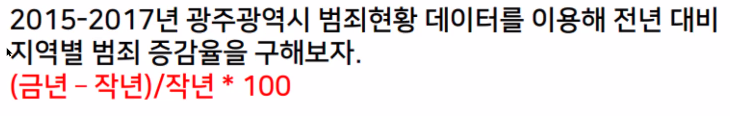
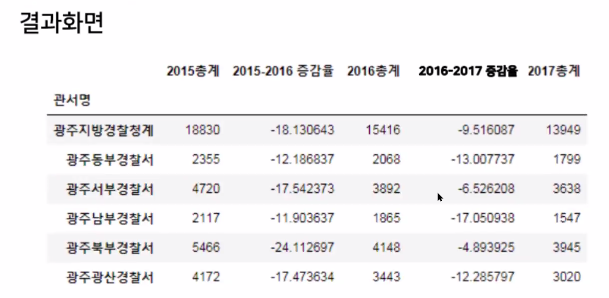

In [99]:
crime_2015 = pd.read_csv("./data/2015.csv", encoding="euc-kr")
crime_2016 = pd.read_csv("./data/2016.csv", encoding="euc-kr")
crime_2017 = pd.read_csv("./data/2017.csv", encoding="euc-kr")

In [134]:
# 풀이 
# 1. 데이터 필터링 ★ 
# 구분 = '발생건수' 인 데이터 추출 -> 발생건수+검거수 등 중복되기 때문에
crime15_ft = crime_2015[crime_2015["구분"]=="발생건수"].copy()
crime15_ft["2015총계"] = crime15_ft.loc[:,"살인":"폭력"].sum(axis=1)
crime15_ft

,관서명,구분,살인,강도,강간·강제추행,절도,폭력,2015총계
0,광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
6,광주동부경찰서,발생건수,3,5,92,1100,1155,2355
12,광주서부경찰서,발생건수,5,10,172,2050,2483,4720
18,광주남부경찰서,발생건수,1,3,70,962,1081,2117
24,광주북부경찰서,발생건수,5,14,256,2570,2621,5466
30,광주광산경찰서,발생건수,4,12,160,1743,2253,4172


In [135]:
crime16_ft = crime_2016[crime_2016["구분"]=="발생건수"].copy()
crime16_ft["2016총계"] = crime16_ft.loc[:,"살인":"폭력"].sum(axis=1)
crime16_ft

,관서명,구분,살인,강도,강간·강제추행,절도,폭력,2016총계
0,광주지방경찰청계,발생건수,17,47,701,6052,8599,15416
6,광주동부경찰서,발생건수,3,8,83,832,1142,2068
12,광주서부경찰서,발생건수,2,11,174,1417,2288,3892
18,광주남부경찰서,발생건수,1,4,64,768,1028,1865
24,광주북부경찰서,발생건수,6,7,205,1788,2142,4148
30,광주광산경찰서,발생건수,5,17,175,1247,1999,3443


In [136]:
crime17_ft = crime_2017[crime_2017["구분"]=="발생건수"].copy()
crime17_ft["2017총계"] = crime17_ft.loc[:,"살인":"폭력"].sum(axis=1)
crime17_ft

,관서명,구분,살인,강도,강간·강제추행,절도,폭력,2017총계
0,광주지방경찰청계,발생건수,9,33,725,4816,8366,13949
6,광주지방경찰청,발생건수,0,0,0,0,0,0
12,광주동부경찰서,발생건수,3,5,77,624,1090,1799
18,광주서부경찰서,발생건수,0,7,196,1142,2293,3638
24,광주남부경찰서,발생건수,0,4,68,577,898,1547
30,광주북부경찰서,발생건수,3,5,215,1546,2176,3945
36,광주광산경찰서,발생건수,3,12,169,927,1909,3020


In [137]:
# 2017년에만 등장하는 행 삭제 
crime17_ft.drop(6, inplace=True)

In [138]:
display(crime15_ft)

,관서명,구분,살인,강도,강간·강제추행,절도,폭력,2015총계
0,광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
6,광주동부경찰서,발생건수,3,5,92,1100,1155,2355
12,광주서부경찰서,발생건수,5,10,172,2050,2483,4720
18,광주남부경찰서,발생건수,1,3,70,962,1081,2117
24,광주북부경찰서,발생건수,5,14,256,2570,2621,5466
30,광주광산경찰서,발생건수,4,12,160,1743,2253,4172


In [139]:
# 올바른 계산을 위해 인덱스를 맞춰주자 
# 1. 데이터프레임.index  = 새로운 인덱스 or 데이터프레임.columns = 새로운 컬럼즈 
# 2. 데이터프레임.rename() 함수 활용 
# 3. 기존 컬럼을 인덱스로 설정 -> set_index()
crime15_ft.set_index("관서명", inplace=True)
crime16_ft.set_index("관서명", inplace=True)
crime17_ft.set_index("관서명", inplace=True)

In [141]:
# 증감율 계산
crime15to16 = (crime16_ft['2016총계']-crime15_ft['2015총계']) / crime15_ft['2015총계'] * 100
crime16to17 = (crime17_ft['2017총계']-crime16_ft['2016총계']) / crime16_ft['2016총계'] * 100

In [148]:
display(crime16to17)

관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
dtype: float64

In [153]:
# 병합
result = pd.concat([crime15_ft['2015총계'], crime15to16, crime16_ft['2016총계'], crime16to17, crime17_ft['2017총계']], axis=1)
result

,2015총계,0,2016총계,1,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [156]:
result.rename(columns={0:"2015-2016 증감율", 1:"2016-2017 증감율"}, inplace=True)
result

,2015총계,2015-2016 증감율,2016총계,2016-2017 증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


#### 3.6 데이터 병합 (merge) & 문자열 함수 

In [4]:
#데이터로딩
cctv = pd.read_csv("./data/광주광역시_CCTV.csv", encoding="euc-kr")
dong = pd.read_csv("./data/광주광역시_행정동별 현황.csv", encoding="euc-kr")

In [5]:
display(cctv.head())
display(dong.head())

,관리기관명,소재지지번주소,소재지도로명주소,카메라대수,카메라화소,촬영방면,보관일수,설치연도,위도,경도,데이터기준일자
0,광주광역시 사회재난과,광산구 광산동 666-7,광산구 고봉로 905,2,200만,360도,30일,2018,35.225272,126.735854,2023-12-31
1,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1,200만,360도,30일,2013,35.162851,126.699911,2023-12-31
2,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1,200만,360도,30일,2022,35.162851,126.699911,2023-12-31
3,광주광역시 사회재난과,광산구 도산동 1128-4,광산구 도산로9번길 58,4,200만,360도,30일,2020,35.127057,126.789353,2023-12-31
4,광주광역시 사회재난과,광산구 도산동 1282-1,광산구 남동길48번길 25,1,200만,360도,30일,2013,35.130739,126.789865,2023-12-31


,동 별,인구(명),면적(제곱킬로미터),세대수,통,리,반,공무원(명)
0,□동구(13동),105909,49.31,54072,204,NaN,"1,157",181
1,충장동(忠壯洞),5077,1.13,3965,15,NaN,45,15
2,동명동(東明洞),3743,0.43,2426,10,NaN,61,13
3,계림1동(鷄林1洞),10507,0.63,5795,21,NaN,120,14
4,계림2동(鷄林2洞),12893,0.56,5420,22,NaN,144,14


In [24]:
# 양쪽의 동 정보를 전처리 하여 병합해보자 
cctv['동이름'] = cctv['소재지지번주소'].str.split(" ").str[1].str.strip()

In [8]:
dong.columns

Index(['동  별', '인구(명)', '면적(제곱킬로미터)', '세대수', '통', '리', '반', '공무원(명)'], dtype='object')

In [20]:
dong['동이름'] = dong["동  별"].str.split("(").str[0].str.replace("□","").str.strip()

In [23]:
dong

,동 별,인구(명),면적(제곱킬로미터),세대수,통,리,반,공무원(명),동이름
0,□동구(13동),105909,49.31,54072,204,NaN,"1,157",181,동구
1,충장동(忠壯洞),5077,1.13,3965,15,NaN,45,15,충장동
2,동명동(東明洞),3743,0.43,2426,10,NaN,61,13,동명동
3,계림1동(鷄林1洞),10507,0.63,5795,21,NaN,120,14,계림1동
4,계림2동(鷄林2洞),12893,0.56,5420,22,NaN,144,14,계림2동
...,...,...,...,...,...,...,...,...,...
97,임곡동(林谷洞),2048,29.82,1240,27,NaN,53,12,임곡동
98,동곡동(東谷洞),1757,15.49,1003,19,NaN,34,12,동곡동
99,평동(平洞),4889,29.87,2986,24,NaN,78,13,평동
100,삼도동(三道洞),2168,38.73,1329,29,NaN,60,12,삼도동


In [27]:
# merge 
result = pd.merge(cctv, dong, on="동이름", how="outer")

In [30]:
result.head(100)

,관리기관명,소재지지번주소,소재지도로명주소,카메라대수,카메라화소,촬영방면,보관일수,설치연도,위도,경도,데이터기준일자,동이름,동 별,인구(명),면적(제곱킬로미터),세대수,통,리,반,공무원(명)
0,광주광역시 사회재난과,광산구 광산동 666-7,광산구 고봉로 905,2.0,200만,360도,30일,2018.0,35.225272,126.735854,2023-12-31,광산동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,광주광역시 사회재난과,광산구 광산동 548-20,NaN,1.0,200만,360도,30일,2016.0,35.236141,126.738106,2023-12-31,광산동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,광주광역시 사회재난과,광산구 광산동 548-20,NaN,1.0,200만,360도,30일,2018.0,35.236141,126.738106,2023-12-31,광산동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,광주광역시 사회재난과,광산구 광산동 229-1,NaN,2.0,200만,360도,30일,2022.0,35.251293,126.743559,2023-12-31,광산동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1.0,200만,360도,30일,2013.0,35.162851,126.699911,2023-12-31,도덕동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,광주광역시 사회재난과,광산구 비아동 152-5,광산구 비아로 185,2.0,200만,360도,30일,2022.0,35.223641,126.825160,2023-12-31,비아동,비아동(飛鴉洞),7516.0,4.92,3520.0,17.0,NaN,75,14.0
96,광주광역시 사회재난과,광산구 비아동 152-5,광산구 비아로 185,1.0,200만,360도,30일,2022.0,35.223641,126.825160,2023-12-31,비아동,비아동(飛鴉洞),7516.0,4.92,3520.0,17.0,NaN,75,14.0
97,광주광역시 사회재난과,광산구 비아동 66-28,광산구 비아중앙로 18-1,1.0,200만,360도,30일,2013.0,35.220662,126.824870,2023-12-31,비아동,비아동(飛鴉洞),7516.0,4.92,3520.0,17.0,NaN,75,14.0
98,광주광역시 사회재난과,광산구 비아동 66-28,광산구 비아중앙로 18-1,1.0,200만,360도,30일,2022.0,35.220662,126.824870,2023-12-31,비아동,비아동(飛鴉洞),7516.0,4.92,3520.0,17.0,NaN,75,14.0


In [31]:
result = pd.merge(cctv, dong, on="동이름", how="inner")

In [32]:
result.shape

(2208, 20)

In [33]:
result

,관리기관명,소재지지번주소,소재지도로명주소,카메라대수,카메라화소,촬영방면,보관일수,설치연도,위도,경도,데이터기준일자,동이름,동 별,인구(명),면적(제곱킬로미터),세대수,통,리,반,공무원(명)
0,광주광역시 사회재난과,광산구 도산동 1128-4,광산구 도산로9번길 58,4,200만,360도,30일,2020,35.127057,126.789353,2023-12-31,도산동,도산동(道山洞),14860,4.00,6629,35,NaN,162,18
1,광주광역시 사회재난과,광산구 도산동 1282-1,광산구 남동길48번길 25,1,200만,360도,30일,2013,35.130739,126.789865,2023-12-31,도산동,도산동(道山洞),14860,4.00,6629,35,NaN,162,18
2,광주광역시 사회재난과,광산구 도산동 1282-1,광산구 남동길48번길 25,2,200만,360도,30일,2019,35.130739,126.789865,2023-12-31,도산동,도산동(道山洞),14860,4.00,6629,35,NaN,162,18
3,광주광역시 사회재난과,광산구 도산동 1282-1,광산구 남동길48번길 25,1,200만,360도,30일,2022,35.130739,126.789865,2023-12-31,도산동,도산동(道山洞),14860,4.00,6629,35,NaN,162,18
4,광주광역시 사회재난과,광산구 도산동 1283-6,광산구 남동길 42-13,3,200만,360도,30일,2021,35.130713,126.789238,2023-12-31,도산동,도산동(道山洞),14860,4.00,6629,35,NaN,162,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,광주광역시 사회재난과,북구 신용동 642-1,북구 임방울대로1041번길 25,3,200만,360도,30일,2022,35.215496,126.871222,2023-12-31,신용동,신용동(臣龍洞),29243,1.82,11786,23,NaN,160,16
2204,광주광역시 사회재난과,북구 신용동 62-27,북구 복룡길 4,3,200만,360도,30일,2023,35.214685,126.866747,2023-12-31,신용동,신용동(臣龍洞),29243,1.82,11786,23,NaN,160,16
2205,광주광역시 사회재난과,서구 유덕동 497-3,서구 유덕로 22,2,200만,360도,30일,2020,35.164947,126.851836,2023-12-31,유덕동,유덕동(柳德洞),10684,5.49,4859,16,NaN,93,13
2206,광주광역시 사회재난과,광산구 삼도동 823-1,광산구 평동로 29,3,200만,360도,30일,2019,35.128083,126.682771,2023-12-31,삼도동,삼도동(三道洞),2168,38.73,1329,29,NaN,60,12
